In [3]:
from META_TOOLBOX import *
import numpy as np

In [20]:
# Input
D = 6
X_L = [-3] * D
X_U = [3] * D
V_MIN = X_L.copy()
V_MAX = X_U.copy()

PARAMETERS = {
              'MIN VELOCITY (V_MIN)': V_MIN,
              'MAX VELOCITY (V_MAX)': V_MAX,
              'COGNITIVE COEFFICIENT (C_1)': 1.49,
              'SOCIAL COEFFICIENT (C_2)': 1.49,
              'MIN INTERIA (W_MIN)': 0.20,
              'MAX INERTIA (W_MAX)': 1.00,
              'INERTIA UPDATE': 'PSO 1'
             }

T = np.linspace(0, 10, 500)
Y_EXP = np.cos(T) + np.random.normal(0, 0.2, 500) 

NULL_DIC = {
            'T': T,
            'Y_EXP': Y_EXP
}

SETUP = {
        'N_REP': 2,
        'N_POP': 20,
        'N_ITER': 1000,
        'X_L': X_L,
        'X_U': X_U,
        'D': D,
        'NULL_DIC': NULL_DIC,
        'PARAMETERS': PARAMETERS
        }

def F(x, w):
  return w[0] + w[1]*x + w[2]*(x**2) + w[3]*(x**3) + w[4]*(x**4) + w[5]*(x**5)

# OF statement
def OF_FUNCTION(X, NULL_DIC):

    T = NULL_DIC['T']
    Y_EXP = NULL_DIC['Y_EXP']
    Y_NUM = []

    for I in T:
        Y_NUM.append(F(I, X))

    OF = LOSS_FUNCTION_5(Y_EXP, Y_NUM)

    return OF

# Call algorithm
RESULTS_REP, BEST_REP, AVERAGE_REP, WORST_REP, STATUS_PROCEDURE = PSO_ALGORITHM_001(OF_FUNCTION, SETUP)

# Melhor resultado para as dimensões desejadas
BESTBEST = STATUS_PROCEDURE[0]
BEST = BEST_REP[BESTBEST]
AVERAGE = AVERAGE_REP[BESTBEST]
WORST = WORST_REP[BESTBEST]
DIMENSOES = list(BEST['X_POSITION'][-1,:])

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Process Time: 58.03 Seconds 
 Seconds per repetition: 29.01
META_PSO001_REP_0_BEST_0_20230327 153823.xlsx
META_PSO001_REP_1_BEST_1_20230327 153823.xlsx
META_PSO001_RESUME_20230327 153823.xlsx


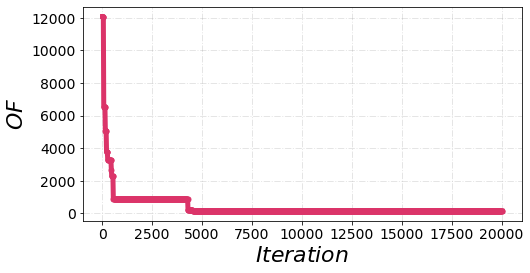

In [17]:
# Chart setup
CHART_SETUP = {   
               'NAME': 'WANDER',
               'WIDTH': 0.20, 
               'HEIGHT': 0.10, 
               'EXTENSION': 'svg',
               'DPI': 500, 
               'COLOR': '#DB3469',
               'MARKER': 'o',  
               'MARKER SIZE': 5,
               'LINE WIDTH': 5,
               'LINE STYLE': '-',
               'Y AXIS LABEL': '$OF$',
               'X AXIS LABEL': '$Iteration$',
               'LABELS SIZE': 22,
               'LABELS COLOR': '#000000',
               'X AXIS SIZE': 14,
               'Y AXIS SIZE': 14,
               'AXISES COLOR': '#000000',
               'Y LOG': False,
               'X LOG': False,
               'ON GRID?': True
              }

# Data
DATA = BEST_REP[STATUS_PROCEDURE[0]]
DATA_RESULTS = {'X': DATA['NEOF'], 'Y': DATA['OF']}

META_PLOT_002(DATA_RESULTS, CHART_SETUP)

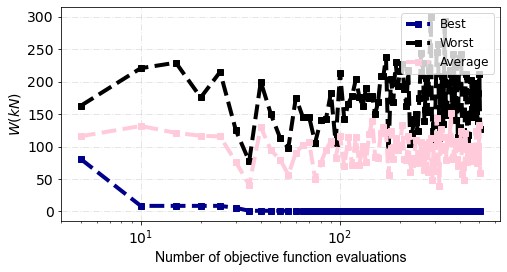

In [4]:
PLOT_SETUP = {
              'NAME': 'WANDER-OFBAW_SIM01',
              'WIDTH': 0.20, 
              'HEIGHT': 0.10,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR BEST': '#00008B',
              'COLOR WORST': '#000000',
              'COLOR AVERAGE': '#ffcbdb',
              'MARKER': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'Y AXIS LABEL': '$W (kN)$',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'LOC LEGEND': 'upper right',
              'SIZE LEGEND': 12,
              'Y LOG': False,
              'X LOG': True
             }
DATASET = {'X': BEST['NEOF'], 'BEST': BEST['OF'], 'AVERAGE': AVERAGE['OF'], 'WORST': WORST['OF']}
META_PLOT_003(DATASET, PLOT_SETUP)

c:\Users\wande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


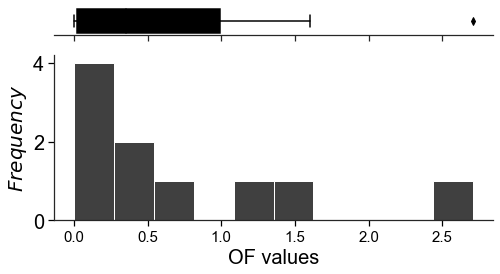

In [8]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF_HISTSIM01',
              'WIDTH': 0.20, 
              'HEIGHT': 0.10,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'MARKER': 's',
              'X AXIS LABEL': 'OF values',
              'X AXIS SIZE': 15,
              'Y AXIS SIZE': 20,
              'LABELS SIZE': 20,
              'LABELS COLOR': '#000000',
              'COLOR': '#000000',
              'AXISES COLOR': '#000000',
              'BINS': 10,
              'KDE': False,
             }
DATASET = {'NUMBER OF REPETITIONS': SETUP['N_REP'], 'NUMBER OF ITERATIONS': SETUP['N_ITER'], 'OF OR FIT': 'OF', 'BEST': BEST_REP}
META_PLOT_004(DATASET, PLOT_SETUP)

In [21]:
DIMENSOES

[1.4936509742681783,
 -2.5864944607783524,
 -0.5184019941239008,
 0.8072506990985189,
 -0.17226480640299463,
 0.010022803293933385]

In [22]:
BEST['OF']

array([2120.05502069, 2120.05502069, 1352.02068985, ...,    7.57218037,
          7.57218037,    7.57218037])